---
# E-commerce
---
<br><br><br>
     

## `Coдержание` :<br>

 - [***Описание исследуемого набора данных***](#Описание-исследуемого-набора-данных)


 - [***Подготовительный этап***](#Подготовительный-этап)
 
 
 - [***Задание №1***](#Задание-№1)
 
 
 - [***Задание №2***](#Задание-№2)
 
  
 - [***Задание №3***](#Задание-№3)
    
  
 - [***Задание №4***](#Задание-№4)
    
    
 - [***Задание №5***](#Задание-№5)
    

 - [***Задание №6***](#Задание-№6)
     
<br><br><br><br><br><br>
     
# [***README проекта-->***](https://github.com/IvanoVladimir/karpov_courses/blob/main/Interim_Project/README.md 'Ссылка на описание проекта')

<br><br>

---
## [***`Описание исследуемого набора данных`***](#E-commerce)
---

Файлы:

- **`olist_customers_datase.csv`** — таблица с уникальными идентификаторами пользователей

**customer_id** — позаказный идентификатор пользователя

**customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)

**customer_zip_code_prefix** —  почтовый индекс пользователя

**customer_city** —  город доставки пользователя

**customer_state** —  штат доставки пользователя


- **`olist_orders_dataset.csv`** —  таблица заказов


**order_id** —  уникальный идентификатор заказа (номер чека)

**customer_id** —  позаказный идентификатор пользователя

**order_status** —  статус заказа

**order_purchase_timestamp** —  время создания заказа

**order_approved_at** —  время подтверждения оплаты заказа

**order_delivered_carrier_date** —  время передачи заказа в логистическую службу

**order_delivered_customer_date** —  время доставки заказа

**order_estimated_delivery_date** —  обещанная дата доставки


- **`olist_order_items_dataset.csv`** —  товарные позиции, входящие в заказы

**order_id** —  уникальный идентификатор заказа (номер чека)

**order_item_id** —  идентификатор товара внутри одного заказа

**product_id** —  ид товара (аналог штрихкода)

**seller_id** — ид производителя товара

**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

**price** —  цена за единицу товара

**freight_value** —  вес товара

<br>

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5


Уникальные статусы заказов в таблице **`olist_orders_dataset`**:

- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён

---
## [***`Подготовительный этап`***](#E-commerce)
---

In [4]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta

sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

In [5]:
Path = 'C:/Users/volod/YandexDisk/JupyterLab/GitHub/karpov_courses/Interim_Project/' 

In [6]:
customers = pd.read_csv(Path + 'olist_customers_dataset.csv')
orders    = pd.read_csv(Path + 'olist_orders_dataset.csv')
items     = pd.read_csv(Path + 'olist_order_items_dataset.csv')

In [7]:
customers.info() #краткая информация по датасетам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


В таблице `orders` присутствуют пропуски.

In [10]:
# количество пропущенных значений по каждому столбцу в таблице `orders`

orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
# Количество строк-дубликатов в каждом датасете

(customers[customers.duplicated()].shape[0], 
 orders   [orders.duplicated()].shape[0],    
 items    [items.duplicated()].shape[0])

(0, 0, 0)

***После изучения представленных датасетов, осмысления описания колонок и понимания того, как устроены данные в них, выделяется следующее:***

- Отсутствие дубликатов;
- Пропуски наблюдаются только таблице `orders`;
- Общий ключ для объединения таблиц `customers` и `orders`, либо `orders` и `items`;
- Столбцы с датой имеют тип **object**, что не позволит корректно проводить вычислительные операции.
<br><br>

    Проанализировав наблюдения собираюсь объединить датасеты в один датафрейм, перевести столбцы с датой в формат date, а также подробно изучить пропуски и описать их взаимосвязь. Есть предположение, что они связаны со статусом заказа, но при объединении датасетов могут проявиться и другие факторы.

In [12]:
# объединяю датасеты `customers` и `orders` в один датафрейм

df = customers.merge(orders, on='customer_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [13]:
# объединяю получившийся датафрейм с датасетом `items` 

result_df = df.merge(items, on='order_id', how='left')
result_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [14]:
# список колонок содержащих дату и время для преобразования в тип datetime

dates_list = ['order_purchase_timestamp', 'order_approved_at', 
              'order_delivered_carrier_date','order_delivered_customer_date', 
              'order_estimated_delivery_date', 'shipping_limit_date'
             ]

In [15]:
# преобразования типов данных

result_df[dates_list] = result_df[dates_list].apply(pd.to_datetime) 

In [16]:
# информация конечных преобразований датафрейма

result_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113425 non-null  object        
 1   customer_unique_id             113425 non-null  object        
 2   customer_zip_code_prefix       113425 non-null  int64         
 3   customer_city                  113425 non-null  object        
 4   customer_state                 113425 non-null  object        
 5   order_id                       113425 non-null  object        
 6   order_status                   113425 non-null  object        
 7   order_purchase_timestamp       113425 non-null  datetime64[ns]
 8   order_approved_at              113264 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

Полученный датафрейм имеет ещё больше пропущенных значений.

In [17]:
# топ 5 городов по количеству строк с пропущенными значениями в процентах 

result_df[result_df.isna().any(axis=1)]['customer_city'] \
         .value_counts(normalize=True).mul(100).round(1).head()

sao paulo         16.8
rio de janeiro     9.0
belo horizonte     2.5
brasilia           2.0
salvador           1.9
Name: customer_city, dtype: float64

In [18]:
# топ 5 городов по количеству строк в процентах

result_df['customer_city'].value_counts(normalize=True).mul(100).round(1).head()

sao paulo         15.8
rio de janeiro     7.0
belo horizonte     2.8
brasilia           2.1
curitiba           1.6
Name: customer_city, dtype: float64

In [19]:
# топ 5 городов по количеству заказов с пропущенными значениями 

result_df[result_df.isna().any(axis=1)].groupby('customer_city')['order_id'] \
                                       .nunique().sort_values(ascending=False).head()

customer_city
sao paulo         496
rio de janeiro    279
belo horizonte     76
brasilia           60
salvador           57
Name: order_id, dtype: int64

In [20]:
# топ 5 городов по количеству заказов 

result_df.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False).head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: order_id, dtype: int64

In [21]:
# распределение пропущенных значений в заказах в разрезе статуса заказа

result_df[result_df.isna().any(axis=1)].groupby('order_status')['order_id'] \
                                       .nunique().sort_values(ascending=False)

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_id, dtype: int64

In [22]:
# количество пропущенных значений по каждому столбцу результирующей таблицы

result_df.isna().sum() 

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

***При сопоставлении сформированных топов по городам и пропущенных значений в других разрезах, замечено что:***
- Пропущенные значения связаны со статусом заказа;
- Присутствует корреляция между предыдущими топами по городам;
- Одинаковое количество пропущенных значений в некоторых столбцах зависит от статуса заказа;
- Основная часть пропусков сосредоточены в столбцах с датой передачи заказа в логистическую службу и датой доставки клиенту.<br><br>


    Всё это говорит о том, что чем больше у города заказов, тем больше у него пропущенных значений в таблице. <br> Единственное, что бросается в глаза – это 23 пропущенных значения со статусом заказа **delivered**. 

In [23]:
# сумма заказов имеющих статус заказа "delivered" с пропущенными значениями по штатам

(result_df[result_df.isna().any(axis=1)].query('order_status=="delivered"')      
                                        .groupby('customer_state')['price'].sum()
                                        .sort_values(ascending=False)
)

customer_state
SP    1827.85
RS     691.99
MG     240.80
RJ     177.99
CE      79.99
MA      79.99
Name: price, dtype: float64

In [24]:
# сумма заказов имеющих статус заказа "delivered" без пропущенных значений по штатам

(result_df[result_df.notna().any(axis=1)].query('order_status=="delivered"')      
                                         .groupby('customer_state')['price'].sum()
                                         .sort_values(ascending=False).head()
)

customer_state
SP    5067633.16
RJ    1759651.13
MG    1552481.83
RS     728897.47
PR     666063.51
Name: price, dtype: float64

Информация в датафрейме не раскрывает причину присутствия пропусков в заказах со статусом **delivered**.<br>
Но поскольку суммы этих заказов по штатам совсем не значительны,<br> 
стоит удалить эти заказы из таблицы, как наличие ошибки при сборе данных.

In [25]:
# создаю переменную с 'order_id', в которых присутвсвуют пропущенные значения

error_orders = result_df[result_df.isna().any(axis=1)] \
                        .loc[result_df.order_status == 'delivered']['order_id']

In [26]:
# удаляю эти сроки из датафрейма

result_df = result_df.query('order_id not in @error_orders') 

Перед тем как приступить к решению заданий, стоит проверить отрицательную разницу во времени между созданием заказа и последующих операций, а именно время оплаты, передачи в логистику и конечной доставки. Время создания заказа – это начальное звено в цепочке процессов и разница с остальными операциями не будет отрицательной. Подобные заказы искажают результаты в решении заданий, а значит стоит заранее от них избавиться. Помимо этого стоит учитывать отрицательную разницу во времени между передачей заказа в логистику и доставки до клиента, так как сначала происходит первое, а не наоборот. Разницу во времени будем измерять в секундах. 

Также не оговорено в какой период происходит оплата между созданием заказа и доставки до клиента. Будем считать, что это происходит в любое время с начала создания заказа, но не позже доставки клиенту.

In [27]:
# минимальное время между созданием заказа и оплатой

(result_df.order_approved_at - result_df.order_purchase_timestamp) \
.dropna().dt.total_seconds().min()

0.0

In [28]:
# минимальное время между созданием заказа и передачи в логистику

(result_df.order_delivered_carrier_date - result_df.order_purchase_timestamp) \
.dropna().dt.total_seconds().min()

-14792753.0

Получили отрицательное значение, значит нужно изучить это более подробно и избавиться ошибок в данных.

In [29]:
# создаю переменную для дальнейших расчётов

time_diff = (result_df.order_delivered_carrier_date - result_df.order_purchase_timestamp) \
            .dropna().dt.total_seconds()

In [30]:
# количество отрицательных значений

time_diff.loc[lambda x : x < 0].count()

187

In [31]:
# создаю переменную номерами индексов отрицательных значений

time_errors = time_diff.loc[lambda x : x < 0].index

In [32]:
# удаляю строки с полученными индексами из таблицы 

result_df = result_df[~result_df.index.isin (time_errors)]

In [33]:
# минимальное время между созданием заказа и доставки до клиента

(result_df.order_delivered_customer_date - result_df.order_purchase_timestamp) \
.dropna().dt.total_seconds().min()

46087.0

Проверка разницы во времени создания заказа и дальнейших операций с ним окончена. Проверяем то же между временем передачи заказа в логистику и доставки до клиента.

In [34]:
# минимальное время междупередачей заказа в логистику и доставки до клиента

(result_df.order_delivered_customer_date - result_df.order_delivered_carrier_date) \
.dropna().dt.total_seconds().min()

-1390709.0

Отрицательное значение. Действуем по аналогии.

In [35]:
time_diff1 = (result_df.order_delivered_customer_date - result_df.order_delivered_carrier_date) \
             .dropna().dt.total_seconds()

In [36]:
# количество отрицательных значений

time_diff1.loc[lambda x : x < 0].count()

50

In [37]:
time_errors1 = time_diff1.loc[lambda x : x < 0].index

In [38]:
result_df = result_df[~result_df.index.isin (time_errors1)]

Осталось проверить разницу во времени между оплатой заказа и доставки до клиента.

In [39]:
# минимальное время между оплатой заказа и доставки до клиента.
(result_df.order_delivered_customer_date - result_df.order_approved_at) \
.dropna().dt.total_seconds().min()

-603906.0

Отрицательное значение. Действуем тем же способом.

In [40]:
time_diff2 = (result_df.order_delivered_customer_date - result_df.order_approved_at) \
             .dropna().dt.total_seconds()

In [41]:
# количество отрицательных значений

time_diff2.loc[lambda x : x < 0].count()

69

In [42]:
time_errors2 = time_diff2.loc[lambda x : x < 0].index

In [43]:
result_df = result_df[~result_df.index.isin (time_errors2)]

Подготовка таблицы для дальнейшего анализа и решения заданий завершена.

---
## [***`Задание №1`***](#E-commerce)
---

Считаем пользователей совершивших покупку только один раз. Фактом покупки будем считать отсутствие пустого значения в столбце **order_approved_at**. Пользователей будем определять по столбцу **customer_unique_id**. Количество покупок равно уникальному значению заказов в столбце **order_id**.

In [44]:
# создаю таблицу отфильтровав необходимые столбцы и значения 

Tusk1 = result_df.loc[result_df['order_approved_at'] \
                 .notna()][['customer_unique_id','order_id']]

In [45]:
# количество пользователей совершивших покупку только один раз

(Tusk1.groupby('customer_unique_id').nunique() == 1).sum()[0]

92805

---
## [***`Задание №2`***](#E-commerce)
---

Нужно посчитать сколько заказов ежемесячно в среднем не доставляется по разным причинам. Недоставленные заказы - это те, у которых стоит пустое значение в столбце **order_delivered_customer_date**. Количество считаем по месяцу с даты создания заказа. Берём заказы только с отрицательным сценарием  – статус заказа *canceled и unavailable*.

In [46]:
# создаю таблицу отфильтровав необходимые столбцы и значения 

Tusk2 = result_df[['order_purchase_timestamp', 'order_status', 
                   'order_id', 'order_delivered_customer_date']]

In [47]:
# создаю столбец с названиями месяца создания заказа

Tusk2['order_purchase_month'] = Tusk2['order_purchase_timestamp'].dt.month_name()

In [48]:
# среднее количество ежемесячно не доставленных заказов по разным причинам

round(Tusk2.query("order_delivered_customer_date.isna() & \
                   order_status in ('canceled', 'unavailable')") 
           .groupby('order_purchase_month')['order_id'].nunique().mean(), 2)

102.33

---
## [***`Задание №3`***](#E-commerce)
---

По каждому товару нужно определить, в какой день недели товар покупается чаще остальных дней недели. Фактом покупки будем считать отсутствие пустого значения в столбце **order_approved_at**. Количество товара считаем по индикатору столбца **product_id**.

In [49]:
# создаю таблицу отфильтровав необходимые столбцы и значения 

Tusk3 = result_df[['product_id', 'order_approved_at']]

In [50]:
# создаю столбец с названиями дня недели покупки товара

Tusk3['weekday'] = Tusk3['order_approved_at'].dt.day_name()

In [51]:
# создаю результирующую таблицу

Tusk3_result = (Tusk3.groupby(['product_id', 'weekday'], as_index= False)
               ['product_id'].size()   
                             .sort_values('size', ascending=False)
                             .drop_duplicates(subset='product_id')
                             .reset_index())[['product_id', 'weekday']]

In [52]:
 # вывод первых 10 товаров и дня недели, когда он чаще всего покупается

Tusk3_result.head(10)

,product_id,weekday
0,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,Tuesday
2,422879e10f46682990de24d770e7f83d,Tuesday
3,99a4788cb24856965c36a24e339b6058,Tuesday
4,368c6c730842d78016ad823897a372db,Thursday
5,389d119b48cf3043d311335e499d9c6b,Tuesday
6,53759a2ecddad2bb87a079a1f1519f73,Tuesday
7,d1c427060a0f73f6b889a5c7c61f2ac4,Tuesday
8,3dd2a17168ec895c781a9191c1e95ad7,Wednesday
9,154e7e31ebfa092203795c972e5804a6,Tuesday


---
## [***`Задание №4`***](#E-commerce)
---

Нужно посчитать сколько покупок у каждого пользователя в среднем в неделю (по месяцам). Фактом покупки будем считать отсутствие пустого значения в столбце **order_approved_at**. Пользователей будем определять по столбцу **customer_unique_id**. Среднее количество покупок в неделю (по месяцам) равно уникальному среднему значению заказов в столбце **order_id** делённое на количество недель в месяце.

In [53]:
# создаю таблицу отфильтровав необходимые столбцы и значения

Tusk4 = result_df.query('order_approved_at.notna()') \
        [['customer_unique_id','order_id', 'order_approved_at']]

In [54]:
# создаю столбец с количеством недель по месяцам в дате покупки

Tusk4['cnt_of_weeks'] = Tusk4['order_approved_at'] \
                             .apply(lambda x: round(x.days_in_month / 7, 2))

In [55]:
# создаю столбец с месяцем и годом из даты покупки

Tusk4['month_year'] = Tusk4['order_approved_at'].dt.to_period('M')

In [56]:
# создаю результирующую таблицу

Tusk4_result = (Tusk4.groupby(['customer_unique_id', 'month_year', 'cnt_of_weeks'])
               ['order_id'].nunique().reset_index()
                           .sort_values(['order_id', 'customer_unique_id'], ascending=False))

In [57]:
# нахожу среднее количество покупок в неделю по месяцам на каждого пользователя

Tusk4_result['avg_purchase'] = round(Tusk4_result['order_id'] 
                                     / Tusk4_result['cnt_of_weeks'], 2)

In [58]:
# вывод первых 10 пользователей и среднего количества покупок в неделю по месяцам

Tusk4_result[['customer_unique_id', 'avg_purchase']].head(10)

,customer_unique_id,avg_purchase
7288,12f5d6e1cbf93dafd9dcc19095df0b3d,1.35
76482,c8460e4251689ba205045f3ea17884a1,0.90
69111,b4e4f24de1e8725b74e4a1f4975116ed,1.00
67477,b08fab27d47a1eb6deda07bfd965ad43,0.93
61947,a239b8e2fbce33780f1f1912e2ee5275,1.00
50414,83e7958a94bd7f74a9414d8782f87628,0.90
23831,3e43e6105506432c953e165fb2acf44c,1.00
14424,25a560b9a6006157838aab1bdbd68624,0.93
94039,f64ec6d8dd29940264cd0bbb5ecade8a,0.70
93539,f50ca6544a0ed8a52cc964e15cbe9cf9,0.68


---
## [***`Задание №5`***](#E-commerce)
---

Используя ***`pandas`***, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким ***retention*** на 3-й месяц.<br><br>

***Retention*** показывает сколько людей вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт. Когортный анализ позволит отобразить пользователей поделённых на группы по месяцам. Считать пользователей будем по уникальному значению столбца **customer_unique_id**, а активность по дате создания заказа **order_purchase_timestamp**. Также возьмём данные только за тот период, в котором будет полный год (с января по декабрь).

In [59]:
# создаю таблицу отфильтровав необходимые столбцы и значения

Tusk5 = result_df[['customer_unique_id', 'order_purchase_timestamp']]

In [60]:
# смотрю за какой год представлены данные

year = Tusk5['order_purchase_timestamp'].dt.year

print(year.unique())

[2017 2018 2016]


In [61]:
# создаю столбец с месяцем и годом даты создания заказа

Tusk5['month_year'] = Tusk5['order_purchase_timestamp'].dt.to_period('M')

In [62]:
# смотрю за какой период представлены данные на каждый год

Tusk5.groupby(year)['month_year'].agg(['min', 'max'])

,min,max
order_purchase_timestamp,,
2016,2016-09,2016-12
2017,2017-01,2017-12
2018,2018-01,2018-10


Под наше задание подходят данные только за **2017**, так как содержат полный год (период с января по декабрь). Но отфильтровывать данные для корректности когортного анализа пока не будем.

In [63]:
# создаю таблицу пользователей с датой первого закака

first_purchase = Tusk5.groupby('customer_unique_id')['order_purchase_timestamp'] \
                                                    .agg([('min_date', 'min')]).reset_index()

In [64]:
# присоединяю получившуюся таблицу с исходной таблицей задания

Tusk5_mediate = Tusk5.merge(first_purchase, how='left', on='customer_unique_id')

In [65]:
# создаю столбец для деления пользователей на когорты по месяцам

Tusk5_mediate['cohorts'] = Tusk5_mediate['min_date'].dt.to_period('M')

In [66]:
# количество дней прошедших с первого заказа на текущий заказ

days_since = Tusk5_mediate['order_purchase_timestamp'] - Tusk5_mediate['min_date']

In [67]:
# количество месяцев прошедших с первого заказа на текущий заказ

Tusk5_mediate['month_since'] = np.floor(days_since / np.timedelta64(1, 'M'))

In [68]:
# фильтрую заказы сделанные позже 3-х месяцев с первого заказа пользователя

Tusk5_result = Tusk5_mediate.query('month_since <= 3')

In [69]:
# функция расчёта Retention

def Reten_func(table, cohorts, period):
    
    result  = (table.groupby([cohorts, period]).customer_unique_id.nunique()  
               / table.groupby(cohorts).customer_unique_id.nunique())
    
    return(result)

In [70]:
# с помощью функции создаю таблицу с расчётом Retention

X = Tusk5_result

Reten_calc = Reten_func(X, X['cohorts'], X['month_since']).mul(100).reset_index() 

In [71]:
# создаю сводную таблицу 

Reten_pivot = Reten_calc.pivot(index  ='cohorts', 
                               columns='month_since', 
                               values ='customer_unique_id').fillna(0)

In [72]:
# фильтрую когорты за 2017 год

Reten_pivot2017 = Reten_pivot.loc['2017']

In [73]:
# когорта с максимальным retention на 3-й месяц

str(Reten_pivot2017[3.0].idxmax()) 

'2017-01'

In [74]:
# визуальное отображение Retention за 2017 год

Style_pivot = (Reten_pivot.loc['2017'].style.format('{:.2f}')
                           .relabel_index(['start', 1, 2, 3], axis=1)
                           .background_gradient(cmap='Blues',vmin=0.5, high=0.1) 
               )

Style_pivot

month_since,start,1,2,3
cohorts,,,,
2017-01,100.00,0.26,0.00,0.52
2017-02,100.00,0.17,0.17,0.35
2017-03,100.00,0.27,0.61,0.34
2017-04,100.00,0.38,0.21,0.04
2017-05,100.00,0.47,0.39,0.33
2017-06,100.00,0.38,0.48,0.32
2017-07,100.00,0.39,0.23,0.28
2017-08,100.00,0.65,0.26,0.38
2017-09,100.00,0.49,0.46,0.41


---
## [***`Задание №6`***](#E-commerce)
---

Используя ***`python`***, построить ***RFM-сегментацию*** пользователей, чтобы оценить аудиторию. Поделим данные на 4 сегмента, из которых получим кластеры, как описано в условии задания.

In [75]:
# создаю таблицу отфильтровав необходимые столбцы и значения

Tusk6 = result_df[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]

In [76]:
# дата последней покупки в отчётном периоде

Last_date = Tusk6['order_approved_at'].max() + timedelta(days=1)

In [77]:
# создаю таблицу с нужными категориями для последующей сегментации

RFM = (Tusk6.groupby('customer_unique_id')
            .agg({'order_approved_at': lambda x: (Last_date - x.max()).days, # Дни с последнего заказа
                  'order_id': 'nunique',                                    # Количество заказов
                  'price': 'sum'})                                         # Общая сумма по всем заказам
            .rename(columns={'order_approved_at': 'R', 
                             'order_id': 'F', 
                             'price': 'M'})
      )

In [78]:
# таблица квантилей для деления метрик на ранги 

q = RFM[['R', 'F', 'M']].quantile([.25, .50, .75])

In [79]:
# функция расчёта метрики Recency 

def RClass(value,parameter_name,quantiles_table):
    
    
    if value   <= quantiles_table[parameter_name][0.25]:
        
        return 1
    
    elif value <= quantiles_table[parameter_name][0.50]:
        
        return 2
    
    elif value <= quantiles_table[parameter_name][0.75]: 
        
        return 3
    
    else:
        
        return 4

    
# функция расчёта метрик Frequency и Monetary
    
def FMClass(value, parameter_name,quantiles_table):
    
    
    if value   <= quantiles_table[parameter_name][0.25]:
        
        return 4
    
    elif value <= quantiles_table[parameter_name][0.50]:
        
        return 3
    
    elif value <= quantiles_table[parameter_name][0.75]: 
        
        return 2
    
    else:
        
        return 1

In [80]:
# присваиваю ранг каждому значению в столбцах с метриками

RFM['R'] = RFM['R'].apply(RClass, args=('R', q))
RFM['F'] = RFM['F'].apply(FMClass, args=('F', q))
RFM['M'] = RFM['M'].apply(FMClass, args=('M', q))

In [81]:
# соединяю сегменты в числовые кластеры

RFM['clusters'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

In [82]:
# даю каждому кластеру именования

Seg_map = {r'444': 'Лучшие',
           r'4[1-4][1-4]': 'Потенциальные',
           r'[3-4][1-2][1-2]': 'Новые',
           r'[2-3][3-4][3-4]': 'Постоянные',
           r'[2-3][3-4][1-4]': 'Требуют внимания',
           r'[2-3][1-4][1-4]': 'Почти потеряны',
           r'[1-2][1-4][1-4]': 'Вялые',
           r'111': 'Бездействующие'
          }

RFM['cluster_name'] = RFM['clusters'].replace(Seg_map, regex=True)

In [83]:
# вывод пользователей по кластерам

Clusters = RFM.cluster_name.value_counts().to_frame()
Clusters

,cluster_name
Вялые,23955
Постоянные,23624
Требуют внимания,22818
Потенциальные,17669
Лучшие,6245
Почти потеряны,926
Новые,595


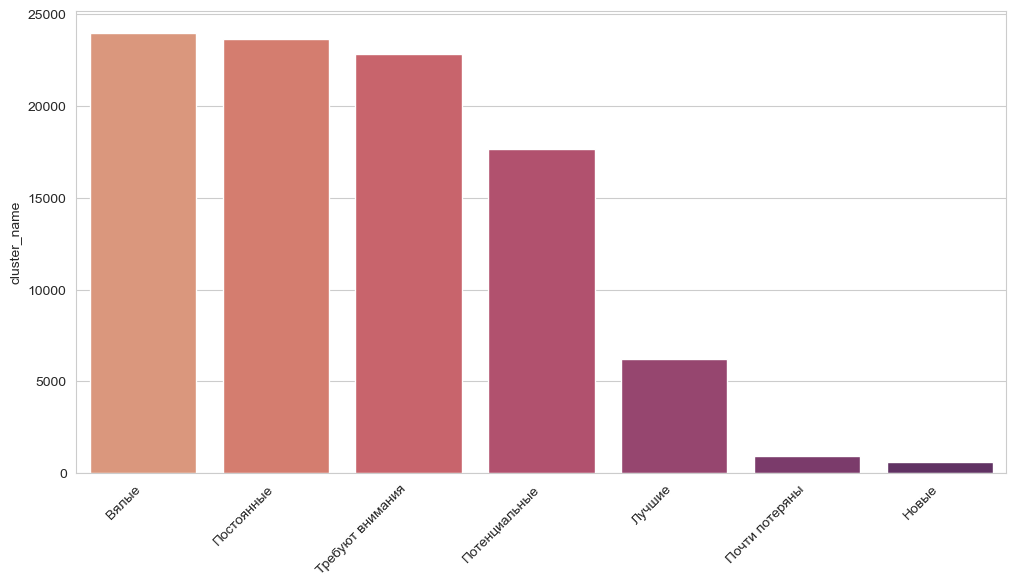

In [84]:
# визуальное отображение

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=Clusters, x=Clusters.index, y='cluster_name', palette="flare", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

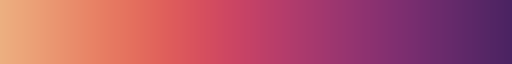

In [85]:
sns.color_palette("flare", as_cmap=True)

# [***К содержанию -->***](#E-commerce)
---